# Earth Science Citation Replication Project

## 0. Import Packages

In [40]:
import csv
import pandas as pd
from time import sleep
from datetime import datetime
import re
import os
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

*Be sure to either keep this notebook in the same folder as your data, or use os to change directories

In [117]:
#os.chdir('yourDataDirectory')

## 1. Import and clean your input file:

In [94]:
#Import csv

data = pd.read_csv("master_sample.csv", encoding="ISO-8859-1")
data

,Unnamed: 0,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,WC,SC,GA,UT,PM,OA,HC,HP,DA,INSTITUTION
0,1289,J,"Nusbaumer, J; Noone, D",NaN,NaN,NaN,"Nusbaumer, Jesse; Noone, David",NaN,NaN,Numerical Evaluation of the Modern and Future ...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GN9IH,WOS:000439508000007,30381797.0,"Green Accepted, Bronze",NaN,NaN,6/19/2020,CUBoulder
1,1320,J,"Wagner, A; Heinzeller, D; Wagner, S; Rummler, ...",NaN,NaN,NaN,"Wagner, Andreas; Heinzeller, Dominikus; Wagner...",NaN,NaN,Explicit Convection and Scale-Aware Cumulus Pa...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GL4CL,WOS:000437094500014,NaN,Bronze,NaN,NaN,6/19/2020,CUBoulder
2,1716,B,"Barry, RG; Hall-McKim, EA","Barry, RG; HallMcKim, EA",NaN,NaN,"Barry, Roger G.; Hall-McKim, Eileen A.","Barry, RG; HallMcKim, EA",NaN,"The Setting, History of Studies, and the Clima...",...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,BO7BJ,WOS:000522817700002,NaN,Bronze,NaN,NaN,6/19/2020,CUBoulder
3,4787,J,"Guillod, BP; Orlowsky, B; Miralles, DG; Teulin...",NaN,NaN,NaN,"Guillod, B. P.; Orlowsky, B.; Miralles, D. G.;...",NaN,NaN,Land-surface controls on afternoon precipitati...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,AP3QK,WOS:000341991600008,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020,CUBoulder
4,245,J,"D'Ambro, EL; Schobesberger, S; Gaston, CJ; Lop...",NaN,NaN,NaN,"D'Ambro, Emma L.; Schobesberger, Siegfried; Ga...",NaN,NaN,Chamber-based insights into the factors contro...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,IV8BG,WOS:000484490100002,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/2020,CUBoulder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,432,J,"Rangarajan, R; Laskar, AH; Bhattacharya, SK; S...",NaN,NaN,NaN,"Rangarajan, Ravi; Laskar, Amzad H.; Bhattachar...",NaN,NaN,An insight into the western Pacific wintertime...,...,"Engineering, Civil; Geosciences, Multidiscipli...",Engineering; Geology; Water Resources,ER5VE,WOS:000398871100009,NaN,NaN,NaN,NaN,7/16/2020,Houston
996,316,J,"Ahmad, L; Khan, SD; Shah, MT; Jehan, N",NaN,NaN,NaN,"Ahmad, Laeiq; Khan, Shuhab D.; Shah, M. Tahir;...",NaN,NaN,"Gold mineralization in Bubin area, Gilgit-Balt...",...,"Geosciences, Multidisciplinary",Geology,FU1NZ,WOS:000423618000007,NaN,NaN,NaN,NaN,7/16/2020,Houston
997,698,J,"Baier, BC; Brune, WH; Lefer, BL; Miller, DO; M...",NaN,NaN,NaN,"Baier, Bianca C.; Brune, William H.; Lefer, Ba...",NaN,NaN,Direct ozone production rate measurements and ...,...,NaN,NaN,NaN,WOS:000356991000010,NaN,NaN,NaN,NaN,NaN,Houston
998,839,J,"Hossain, F; Siddique-E-Akbor, AHM; Yigzaw, W; ...",NaN,NaN,NaN,"Hossain, Faisal; Siddique-E-Akbor, A. H. M.; Y...",NaN,NaN,"CROSSING THE ""VALLEY OF DEATH"" Lessons Learned...",...,NaN,NaN,NaN,WOS:000342552400008,NaN,NaN,NaN,NaN,NaN,Houston


### Data Clean up

In [95]:
#Select three columns: Cited References, DOI of paper, and Institution
citedref = data[['CR', 'DI', 'INSTITUTION']]
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Arnault J, 2016, J HYDROMETEOROL, V17, P1489, ...",10.1175/MWR-D-17-0238.1,CUBoulder
2,"AMAP, 2017, SNOW WAT IC PERM ARC; AMAP, 2011, ...",NaN,CUBoulder
3,"Aires Filipe, 2014, Journal of Climate, V27, P...",10.5194/acp-14-8343-2014,CUBoulder
4,"ATKINSON R, 1987, INT J CHEM KINET, V19, P799,...",10.5194/acp-19-11253-2019,CUBoulder
...,...,...,...
995,"Araguas-Araguas L, 2000, HYDROL PROCESS, V14, ...",10.1016/j.jhydrol.2017.01.047,Houston
996,"Ahmad L, 2016, EARTH SCI INFORM, V9, P113, DOI...",10.1007/s12517-017-3354-9,Houston
997,NaN,10.1016/j.atmosenv.2015.05.033,Houston
998,NaN,10.1175/BAMS-D-13-00176.1,Houston


Testing data cleanup method for Berkeley data.
For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
*See notes later

In [96]:
citedref = (citedref.set_index(citedref.columns.drop('CR',1).tolist())
   ...:    .CR.str.split('; ', expand=True)
   ...:    .stack()
   ...:    .reset_index()
   ...:    .rename(columns={0:'CR'})
   ...:    .loc[:, citedref.columns]
   ...: )
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder
...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston


#### Quickly summarize how many cited references by institution:

In [106]:
citedref_summary = citedref.groupby('INSTITUTION').count()
citedref_summary

,CR,DI,citedDOI
INSTITUTION,,,
Berkeley,16851,15990,13157
CUBoulder,24042,22785,19848
Houston,1602,1602,1193
UCLA,13085,13085,10747


#### Does it add up?

In [107]:
citedref_summary.CR.sum()

55580

#### Yep! 

#### Now... 
Rather than trying to split the unstructured, dirty data, we'll use regex to pull out the DOI into new column:

In [108]:
citedref['citedDOI'] = citedref['CR'].str.extract('(10\.\S*[^,\s])', expand=True)[0]
citedref['citedDOI'] = citedref.citedDOI.str.rstrip(']')

In [109]:
citedref

,CR,DI,INSTITUTION,citedDOI
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder,10.1007/s10584-016-1750-x
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder,10.1175/MWR3123.1
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder,10.1002/2014JD022602
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder,10.1175/JCLI-D-14-00623.1
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder,10.1029/2008GL035481
...,...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston,NaN
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston,10.1016/j.mineng.2013.03.010
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston,NaN
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston,NaN


### Export this to CSV:

In [110]:
citedref.to_csv('citedRef_master.csv', encoding='utf-8')

## Crossref

#### Rather than cleaning up the sloppy citation data, we'll use the articles' DOIs to get the journal metadata from the CrossRef API. We'll start by creating variables for the APIs url and the header we'll need to send along with it.

*Note: insert you're own email into the header* 

In [50]:
url = 'http://api.crossref.org/works/'
header = {'User-Agent': 'EarthSciCitations (https://github.com/samteplitzky/Earth-Science-Citation-Replication-Project; mailto:your_email@your_institution.edu)'}

Now we'll use requests to send a query for each DOI to the CrossRef API. this will get the article metadata from CrossRef, write to new csv.

*This takes a loooooooooong time to run!. Best to execute at the end of your work day. Should be completed by tomorrow. It took ten hours when I ran it.*

In [51]:
timestamp=datetime.timestamp(datetime.now())
print('start time: ',datetime.fromtimestamp(timestamp))
with open('citedRefsMeta.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Inst','citingDOI','CR','citedDOI', 'title', 'journal_book', 'date','issn1', 'issn1Type', 'issn2', 'issn2Type', 'isbn'])
    for i, row in citedref.iterrows():
        sleep(.2)
        if pd.notna(row['citedDOI']):
            query = url+row['citedDOI']
            #print(query)
            response = requests.get(query, headers=header)
            if response.status_code == 200:
                data = json.loads(response.content.decode('utf-8'))
                
                if 'container-title' in data['message']:
                    journal = data['message']['container-title']
                    if len(journal) > 0:
                        journal = journal[0]
                    else: journal = 'nan'                    
                else:
                    journal='nan'
                    
                year = data['message']['created']['date-parts'][0][0]
                
                if 'title' in data['message']:
                    title = data['message']['title']
                    if len(title) > 0:
                        title = title[0]
                    else:
                        title = 'nan'
                else:
                    title='nan'
                    
                if 'ISBN' in data['message']:                     
                    isbn = data['message']['ISBN'][0]
                    
                    writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, 'nan', 'nan', 'nan', 'nan', isbn])
                else:
                    
                    if 'ISSN' in data['message']:
                        issn1 = data['message']['issn-type'][0]['value']
                        issn1Type = data['message']['issn-type'][0]['type']
                        
                        if len(data['message']['issn-type'])>1:
                            issn2 = data['message']['issn-type'][1]['value']
                            issn2Type = data['message']['issn-type'][1]['type']
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, issn2, issn2Type,'nan'])
                        
                        else:
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, 'nan', 'nan','nan'])
                    else:
                        writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, 'nan', 'nan', 'nan', 'nan','nan'])
            else:
                writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'],'nan','nan', 'nan', 'nan', 'nan', 'nan', 'nan','nan'])
        else:
            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], 'nan','nan','nan', 'nan', 'nan', 'nan', 'nan','nan'])

timestamp=datetime.timestamp(datetime.now())
print('end time: ',datetime.fromtimestamp(timestamp))

start time:  2020-07-21 16:36:43.154537
end time:  2020-07-22 02:20:15.011662


## All done? Yay, good morning!
read in the new citedRefsMeta.csv file to a pandas dataframe:

In [52]:
citedRefsMeta = pd.read_csv('citedRefsMeta.csv', encoding='utf-8')

In [54]:
citedRefsMeta

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn
0,CUBoulder,10.1029/2017JD028081,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1007/s10584-016-1750-x,Projected changes in tropical cyclone activity...,Climatic Change,2016.0,0165-0009,print,1573-1480,electronic,NaN
1,CUBoulder,10.1029/2017JD028081,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1175/MWR3123.1,Interpretation of Enhanced Integrated Water Va...,Monthly Weather Review,2006.0,0027-0644,print,1520-0493,electronic,NaN
2,CUBoulder,10.1029/2017JD028081,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1002/2014JD022602,The summer 2012 Greenland heat wave: In situ a...,Journal of Geophysical Research: Atmospheres,2015.0,2169-897X,print,NaN,NaN,NaN
3,CUBoulder,10.1029/2017JD028081,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1175/JCLI-D-14-00623.1,Evaluating Observation Influence on Regional W...,Journal of Climate,2015.0,0894-8755,print,1520-0442,electronic,NaN
4,CUBoulder,10.1029/2017JD028081,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2008GL035481,Extreme changes in stable hydrogen isotopes an...,Geophysical Research Letters,2008.0,0094-8276,print,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55448,Houston,10.1007/s12517-017-3354-9,"Robb LJ., 2013, INTRO ORE FORMING PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55449,Houston,10.1007/s12517-017-3354-9,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1016/j.mineng.2013.03.010,Rare Earth Element deportment studies utilisin...,Minerals Engineering,2013.0,0892-6875,print,NaN,NaN,NaN
55450,Houston,10.1007/s12517-017-3354-9,"Sweatman T, 1995, AUST AGEN INT DEV, V91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55451,Houston,10.1007/s12517-017-3354-9,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Isolate Journal and Book Titles

In [111]:
citedRefsMeta['journal_book']

0                                     Climatic Change
1                              Monthly Weather Review
2        Journal of Geophysical Research: Atmospheres
3                                  Journal of Climate
4                        Geophysical Research Letters
                             ...                     
55448                                             NaN
55449                            Minerals Engineering
55450                                             NaN
55451                                             NaN
55452                            Geoscience Frontiers
Name: journal_book, Length: 55453, dtype: object

#### Take Counts for each title

In [57]:
#citedRefMeta['count'] = citedRefMeta.groupby('journal_book').transform('count')

citedRefsMeta_count = citedRefsMeta['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_count

,journal_book,counts
0,Journal of Geophysical Research,2509
1,Geophysical Research Letters,2451
2,Atmospheric Chemistry and Physics,1310
3,Journal of Climate,1241
4,Science,1201
...,...,...
2653,"CAB Reviews: Perspectives in Agriculture, Vete...",1
2654,CVGIP: Graphical Models and Image Processing,1
2655,"Strike-Slip Deformation, Basin Formation, and ...",1
2656,Geophysical Characterization of Gas Hydrates,1


In [58]:
citedRefsMeta_count['cumsum'] = citedRefsMeta_count['counts'].cumsum()
citedRefsMeta_count

,journal_book,counts,cumsum
0,Journal of Geophysical Research,2509,2509
1,Geophysical Research Letters,2451,4960
2,Atmospheric Chemistry and Physics,1310,6270
3,Journal of Climate,1241,7511
4,Science,1201,8712
...,...,...,...
2653,"CAB Reviews: Perspectives in Agriculture, Vete...",1,44195
2654,CVGIP: Graphical Models and Image Processing,1,44196
2655,"Strike-Slip Deformation, Basin Formation, and ...",1,44197
2656,Geophysical Characterization of Gas Hydrates,1,44198


In [59]:
citedRefsMeta_count['titlenum'] = range(1, 1+len(citedRefsMeta_count))
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum
0,Journal of Geophysical Research,2509,2509,1
1,Geophysical Research Letters,2451,4960,2
2,Atmospheric Chemistry and Physics,1310,6270,3
3,Journal of Climate,1241,7511,4
4,Science,1201,8712,5
...,...,...,...,...
2653,"CAB Reviews: Perspectives in Agriculture, Vete...",1,44195,2654
2654,CVGIP: Graphical Models and Image Processing,1,44196,2655
2655,"Strike-Slip Deformation, Basin Formation, and ...",1,44197,2656
2656,Geophysical Characterization of Gas Hydrates,1,44198,2657


In [61]:
citedRefsMeta_count['titlepct'] = 100*(citedRefsMeta_count.titlenum/2658)
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum,titlepct
0,Journal of Geophysical Research,2509,2509,1,0.037622
1,Geophysical Research Letters,2451,4960,2,0.075245
2,Atmospheric Chemistry and Physics,1310,6270,3,0.112867
3,Journal of Climate,1241,7511,4,0.150489
4,Science,1201,8712,5,0.188111
...,...,...,...,...,...
2653,"CAB Reviews: Perspectives in Agriculture, Vete...",1,44195,2654,99.849511
2654,CVGIP: Graphical Models and Image Processing,1,44196,2655,99.887133
2655,"Strike-Slip Deformation, Basin Formation, and ...",1,44197,2656,99.924755
2656,Geophysical Characterization of Gas Hydrates,1,44198,2657,99.962378


In [112]:
citedRefsMeta_count['citationpct'] = 100*citedRefsMeta_count['cumsum']/(44199)
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,2509,2509,1,0.037622,5.676599
1,Geophysical Research Letters,2451,4960,2,0.075245,11.221973
2,Atmospheric Chemistry and Physics,1310,6270,3,0.112867,14.185841
3,Journal of Climate,1241,7511,4,0.150489,16.993597
4,Science,1201,8712,5,0.188111,19.710853
...,...,...,...,...,...,...
2653,"CAB Reviews: Perspectives in Agriculture, Vete...",1,44195,2654,99.849511,99.990950
2654,CVGIP: Graphical Models and Image Processing,1,44196,2655,99.887133,99.993213
2655,"Strike-Slip Deformation, Basin Formation, and ...",1,44197,2656,99.924755,99.995475
2656,Geophysical Characterization of Gas Hydrates,1,44198,2657,99.962378,99.997738


## Plot 80/20 rule

In [115]:
ind=np.argmin(abs(80.-citedRefsMeta_count.citationpct))
pctile = citedRefsMeta_count.titlepct[ind]
pctile

7.975921745673439

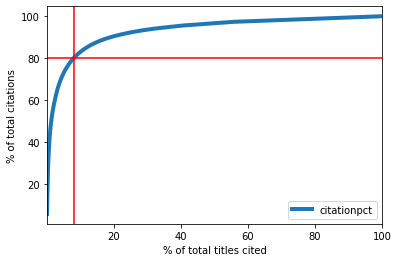

In [116]:
newlines = citedRefsMeta_count.plot.line(x='titlepct', y='citationpct', linewidth=4)
newlines.axhline(y=80, color='r')
newlines.axvline(x=pctile, color='r')
newlines.set_ylabel('% of total citations')
newlines.set_xlabel('% of total titles cited')
plt.show()

### Notes and some references:

*Note: on splitting & stacking method*  
For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
https://gist.github.com/jlln/338b4b0b55bd6984f883

## Experimental stuff below

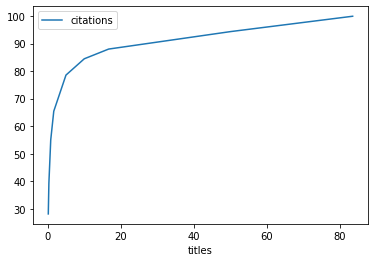

In [91]:
df = pd.DataFrame({ 'titles': [.17, .33, .84, 1.67, 5.01, 10.02, 16.7, 50.11, 83.51],
    'citations': [28.14, 39.26, 55.04, 65.44, 78.56, 84.48, 88.01, 94.36, 99.93]
    }, index=[.17, .33, .84, 1.67, 5.01, 10.02, 16.7, 50.11, 83.51])
lines = df.plot.line(x='titles', y='citations')

plt.show()

In [59]:
re.search('^Python', text)

<re.Match object; span=(0, 6), match='Python'>

In [55]:
text = 'Python is great'

Some regex experiments

In [336]:
ucb_citedref_split.CR[58386]

'Gilichinsky D.A., 2011, ENCY GEOBIOLOGY, P726, DOI [DOI 10.1007/978-1-4020-9212-1_162, 10.1007/978-1-4020-9212-1 162]'

In [48]:
text1 = ucb_citedref_split.CR[68]

In [49]:
text2 = ucb_citedref_split.CR[70]

In [84]:
text3 = ucbCRsample.CR[262]

In [85]:
text4 = ucbCRsample.CR[458]

In [86]:
print(text1)
print(text2)
print(text3)
print(text4)

DIETRICH WE, 1995, HYDROL PROCESS, V9, P383, DOI 10.1002/hyp.3360090311
Dietrich WE, 2008, P 4 INT C DEBR FLOW
Koven CD, 2013, NAT GEOSCI, V6, P452, DOI [10.1038/ngeo1801, 10.1038/NGEO1801]
Raich J. W., 2001, GLOBAL ANN SOIL RESP, DOI [10. 3334/ORNLDAAC/622, DOI 10.3334/0RNLDAAC/622]


In [148]:
re.findall('10\.\S*[^]\s]', text3)[0].split(',')[0]

'10.1038/ngeo1801'

In [73]:
re.sub('^.+?(?=10)','', text)

NameError: name 'text' is not defined

In [226]:
print(doi)

['DOI 10.5281/ZENODO.1054761]']


In [116]:
page = re.findall('\sP\S*,', text)

parsing the crossref response

In [37]:
response = requests.get('http://api.crossref.org/works/10.1002/9781118358092')

In [38]:
data = json.loads(response.content.decode('utf-8'))

In [39]:
jTitle = data['message']['container-title']

In [424]:
issn1 = data['message']['issn-type'][0]['value']

In [429]:
issn1Type = data['message']['issn-type'][0]['type']

In [ ]:
if len(data['message']['issn-type'])>1:
    issn2 = data['message']['issn-type'][1]['value']
    issn1Type = data['message']['issn-type'][1]['type']

In [43]:
if
data['message']['container-title']

[]

In [40]:
data

{'status': 'ok',
 'message-type': 'work',
 'message-version': '1.0.0',
 'message': {'indexed': {'date-parts': [[2020, 3, 28]],
   'date-time': '2020-03-28T02:47:51Z',
   'timestamp': 1585363671073},
  'publisher-location': 'Chichester, UK',
  'reference-count': 0,
  'publisher': 'John Wiley & Sons, Ltd',
  'isbn-type': [{'value': '9780470671511', 'type': 'print'},
   {'value': '9781118358092', 'type': 'electronic'}],
  'content-domain': {'domain': [], 'crossmark-restriction': False},
  'short-container-title': [],
  'published-print': {'date-parts': [[2012, 10, 26]]},
  'DOI': '10.1002/9781118358092',
  'type': 'book',
  'created': {'date-parts': [[2012, 9, 20]],
   'date-time': '2012-09-20T09:20:39Z',
   'timestamp': 1348132839000},
  'source': 'Crossref',
  'is-referenced-by-count': 6,
  'title': ['The Biology and Ecology of Tintinnid Ciliates'],
  'prefix': '10.1002',
  'member': '311',
  'container-title': [],
  'original-title': [],
  'deposited': {'date-parts': [[2012, 9, 20]],
 